@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/NOiKfIhQG6A

<h1 style="color:purple">Bagging: Meta Estimador</h1>
<h1 style="color:indianred">Clasificación y Regresión</h1>
<h2 style="color:purple">Datos salariales</h2>

In [1]:
import pandas as pd

personas = pd.read_csv("salarios.csv")
personas

,edad,estudio,horas,clase_salario,valor_salario
0,27,9,40,0,12967.33
1,30,9,40,0,20171.40
2,42,9,40,1,39051.04
3,68,9,25,1,33567.25
4,34,8,40,0,8247.42
...,...,...,...,...,...
95,32,13,55,0,3297.72
96,20,10,25,0,2266.79
97,46,3,40,0,17190.41
98,37,9,45,0,552.72


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h2 style="color:purple"> <span style="color:indianred">N </span> Muestreos para <span style="color:indianred">N </span> Modelos</h2>

In [2]:
for i in range(5):
    print(personas.sample(frac=1/10), "\n")

    edad  estudio  horas  clase_salario  valor_salario
77    19        5     40              0        2285.43
96    20       10     25              0        2266.79
99    47        9     12              1       32805.86
75    50        9     40              0        5266.42
47    35       10     60              0        9017.51
3     68        9     25              1       33567.25
81    34       10     72              1       38097.13
83    36       10     55              0        9756.55
10    49        3     20              0       19401.31
42    24        9     40              0       17190.41 

    edad  estudio  horas  clase_salario  valor_salario
90    59        9     35              1       26872.43
24    35       13     60              0       13489.00
27    21       10     25              0       22140.10
12    66       11     30              1       33573.46
75    50        9     40              0        5266.42
98    37        9     45              0         552.72
61    43

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h2 style="color:purple">Escalamiento de los Datos</h2>

In [3]:
from sklearn.preprocessing import MinMaxScaler

personas = MinMaxScaler().fit_transform(personas)
personas

array([[0.15873016, 0.53333333, 0.54929577, 0.        , 0.2510676 ],
       [0.20634921, 0.53333333, 0.54929577, 0.        , 0.39675954],
       [0.3968254 , 0.53333333, 0.54929577, 1.        , 0.77857306],
       [0.80952381, 0.53333333, 0.33802817, 1.        , 0.66767131],
       [0.26984127, 0.46666667, 0.54929577, 0.        , 0.15561422],
       [0.14285714, 0.8       , 0.69014085, 0.        , 0.12572228],
       [0.0952381 , 0.2       , 0.33802817, 0.        , 0.03466478],
       [0.04761905, 0.6       , 0.54929577, 0.        , 0.33647331],
       [0.06349206, 0.6       , 0.1971831 , 0.        , 0.03441342],
       [0.38095238, 0.6       , 0.54929577, 0.        , 0.26111527],
       [0.50793651, 0.13333333, 0.26760563, 0.        , 0.38118558],
       [0.22222222, 0.6       , 0.54929577, 0.        , 0.1103994 ],
       [0.77777778, 0.66666667, 0.4084507 , 1.        , 0.66779689],
       [0.65079365, 0.53333333, 0.54929577, 1.        , 0.5173322 ],
       [0.26984127, 0.8       , 0.

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

<h2 style="color:purple">Visualización de los Datos</h2>
<h2 style="color:indianred">Estudio, Horas, Edad -> Salario</h2>


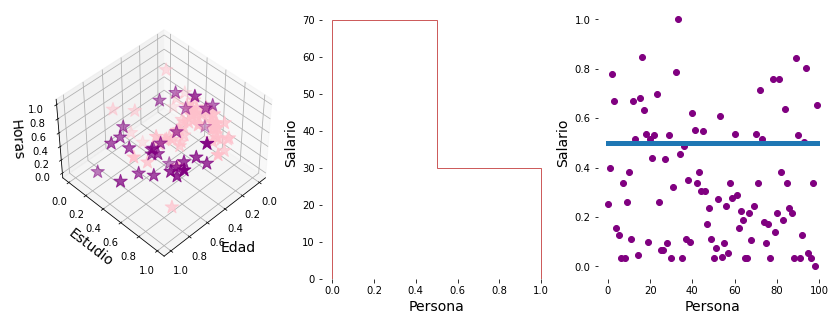

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 5))

# Gráfica de dispersión -> Edad, Estudio y Horas
ax = fig.add_subplot(1, 3, 1, projection="3d")
colores = ("pink", "purple")
for clase in (0, 1):
    ax.scatter(personas.T[0][personas.T[3]==clase], 
               personas.T[1][personas.T[3]==clase], 
               personas.T[2][personas.T[3]==clase],
               marker="*", c=colores[clase], s=200)
ax.set_xlabel("Edad", size=14)
ax.set_ylabel("Estudio", size=14)
ax.set_zlabel("Horas", size=14)
ax.view_init(45, 45)

# Histograma -> clase salarial
ax = fig.add_subplot(1, 3, 2)
ax.hist(personas.T[3], bins=2, histtype="step", color="indianred")
ax.set_ylabel("Salario", size=14)
ax.set_xlabel("Persona", size=14)
plt.setp(ax.spines.values(), linewidth=0)

# Visualización del salario de las personas
ax = fig.add_subplot(1, 3, 3)
ax.plot(personas.T[4], marker="o", linewidth=0, color="purple")
ax.plot([0.5]*100, linewidth=5)
ax.set_ylabel("Salario", size=14)
ax.set_xlabel("Persona", size=14)
plt.setp(ax.spines.values(), linewidth=0)
plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>
<h2 style="color:purple">Creación de Meta-modelos Bagging</h2>
    <h3 style="color:indianred">Estimador base: K-vecinos más cercanos KNN</h3>

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Separando las características de las variables objetivo
datos = personas.T[:-2].T # features
clase = personas.T[3] # clase de salario
valor = personas.T[4] # salario numérico

# Clasificador base y regresor base 
clasificador = KNeighborsClassifier(n_neighbors=3)
regresor = KNeighborsRegressor(n_neighbors=3)

n = 50 # números de modelos: 1 vs 50

# Modelos bagging para clasificaión y regresión con 30% de muestra
meta_clasificador = BaggingClassifier(base_estimator=clasificador, 
                                      n_estimators=n, 
                                      max_samples=0.30).fit(datos, clase)

meta_regresor = BaggingRegressor(base_estimator=regresor, 
                                 n_estimators=n, 
                                 max_samples=0.30).fit(datos, valor)

# Métricas relevantes para clasificación y determinación
print("Accuracy:", 
      accuracy_score(clase, meta_clasificador.predict(datos)))
print("Coeficiente de determinación:", 
      r2_score(valor, meta_regresor.predict(datos)))

Accuracy: 0.84
Coeficiente de determinación: 0.3330847210924719
